# Performance Evaluation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
report = "semeval2017_all_report"
csv_file = "../versions/v0.4.0/reports/"+report+".csv"
lang = 'en'
num_preds = 10
keywords_sorted = False

df = pd.read_csv(csv_file, index_col=0, encoding="utf-8")
ke_methods = [i for i in list(df.columns.values) if i!='metric']
metrics = [i for i in df.index.values if not i.endswith('_var')]
var_idxs = [i for i in df.index.values if i.endswith('_var')]
print(f'KE methods detected: {ke_methods}')
print(f'Evaluation metrics detected: {metrics}')
df

KE methods detected: ['tfidf', 'keybert', 'kpminer', 'yake', 'rake', 'textrank', 'singlerank', 'topicrank', 'novel']
Evaluation metrics detected: ['TP/Results', 'wTP/Results', 'Precision', 'wPrecision', 'MRR', 'wMRR', 'MAP', 'wMAP', 'PbS', 'nDCG']


,tfidf,keybert,kpminer,yake,rake,textrank,singlerank,topicrank,novel
metric,,,,,,,,,
TP/Results,"(855, 4480)","(130, 4480)","(1087, 4480)","(861, 4480)","(1202, 4480)","(1402, 4480)","(1502, 4480)","(1250, 4480)","(457, 4480)"
wTP/Results,"(3088.0, 4480)","(1846.5, 4480)","(3355.9, 4480)","(2879.5, 4480)","(2613.0, 4480)","(2886.7, 4480)","(3034.6, 4480)","(2616.4, 4480)","(2488.3, 4480)"
Precision,0.191,0.029,0.243,0.192,0.268,0.313,0.335,0.279,0.102
wPrecision,0.689,0.412,0.749,0.643,0.583,0.644,0.677,0.584,0.555
MRR,0.501,0.098,0.57,0.401,0.438,0.583,0.549,0.624,0.225
MRR_var,0.167,0.056,0.142,0.127,0.127,0.137,0.132,0.133,0.081
wMRR,0.723,0.247,0.829,0.701,0.8,0.838,0.908,0.882,0.613
wMRR_var,0.171,0.185,0.116,0.152,0.114,0.102,0.069,0.076,0.226
MAP,0.435,0.096,0.502,0.359,0.386,0.516,0.484,0.525,0.209


# Plots

In [3]:
df.drop(var_idxs, inplace=True)

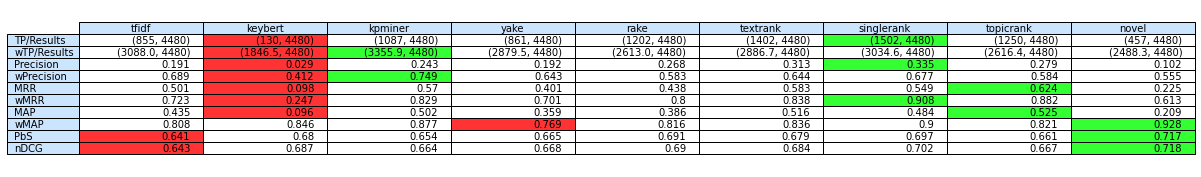

In [4]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
colors = [["w" for _ in range(df.shape[1])] for i in range(df.shape[0])]
max_idxs = [np.argmax(row) for row in df.values[2:]]
min_idxs = [np.argmin(row) for row in df.values[2:]]
max_idxs = [max_idxs[0], max_idxs[1]] + max_idxs
min_idxs = [min_idxs[0], min_idxs[1]] + min_idxs
for i in range(len(max_idxs)):
      colors[i][max_idxs[i]] = "#33FF33"
      colors[i][min_idxs[i]] = "#FF3333"
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,
        colLabels=df.columns.values,
        rowLabels=df.index,
        rowColours =["#CCE5FF"] * df.shape[0],  
        colColours =["#CCE5FF"] * df.shape[1],
        cellColours=colors,
        loc="center")
plt.show()
#plt.savefig('../testing/reports/'+report+'_table.png')

In [5]:
metrics = metrics[2:] # rows
data = df.values[2:-2].astype(float) # (TP, Results) and similar removed

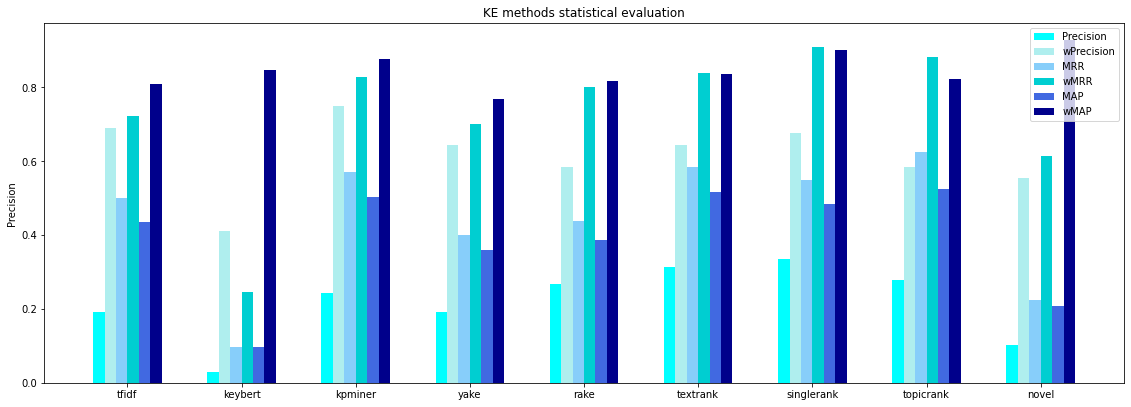

In [6]:
X = np.arange(df.shape[1])
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, data[0], color = 'cyan', width = 0.10)
ax.bar(X - 0.15, data[1], color = 'paleturquoise', width = 0.10)
ax.bar(X - 0.05, data[2], color = 'lightskyblue', width = 0.10)
ax.bar(X + 0.05, data[3], color = 'darkturquoise', width = 0.10)
ax.bar(X + 0.15, data[4], color = 'royalblue', width = 0.10)
ax.bar(X + 0.25, data[5], color = 'darkblue', width = 0.10)
ax.set_xticks([i for i,_ in enumerate(ke_methods)])
ax.set_xticklabels(ke_methods)
ax.set_ylabel('Precision')
ax.legend(metrics[:-2])
ax.set_title('KE methods statistical evaluation')
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

- Precision & wPrecision (True Positives / Total num. predictions)
It's a classification metric. Does not consider the rank of the generated keywords, either proximity of the prediction.

- MRR & wMRR (Mean Reciprocal Rank)
It gives the averaged ranking of the first correct prediction. MRR only cares about the single highest-ranked relevant item.

- MAP & wMAP (Mean Average Precision)
It penalizes if irrelevant key-phrases are extracted higher up the order and gradually decrease the significance of the errors (extraction of irrelevant key-phrase) as we go down the list of extracted key-phrases. Still only classifies keyphrases as relevant/irrelevant.

In [7]:
data = df.values[-2:].astype(float) # only PbS & nDCG

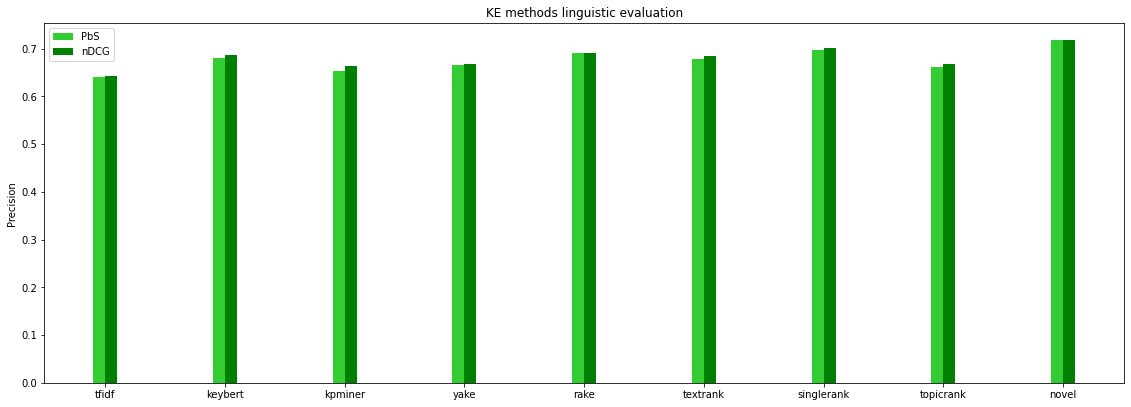

In [8]:
X = np.arange(df.shape[1])
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.05, data[0], color = 'limegreen', width = 0.10)
ax.bar(X + 0.05, data[1], color = 'green', width = 0.10)
ax.set_xticks([i for i,_ in enumerate(ke_methods)])
ax.set_xticklabels(ke_methods)
ax.set_ylabel('Precision')
ax.legend(metrics[-2:])
ax.set_title('KE methods linguistic evaluation')
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

- PbS (Precision by Similarity)
It considers the relevance of the keyphrases using a (non-binary) score (defined by the user). It does not consider the rank.

- nDCG (Discounted Cumulative Gain)
It considers the relevance of the keyphrases using a (non-binary) score (defined by the user). It also considers the rank, but now using logarithmic reduction factor to penalize in proportion.

# Models by metric

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

In [10]:
version_path = "../versions/v0.4.0/reports"
version_files = ['semeval2017_all_report.csv', 'kptimes_500_all_report.csv', 'kpcrowd_all_report.csv']
print(f'Reports for version:\n{version_files}')

metric = 'wMAP'
data = []
for file in version_files:
    prov = pd.read_csv(join(version_path, file), index_col=0, encoding="utf-8").transpose()
    prov.drop(prov.columns.difference([metric]), 1, inplace=True)
    prov.rename(columns={metric: file}, inplace=True)
    data.append(prov)
pd.concat(data, axis=1).transpose()

Reports for version:
['semeval2017_all_report.csv', 'kptimes_500_all_report.csv', 'kpcrowd_all_report.csv']


/tmp/ipykernel_37543/3286490588.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  prov.drop(prov.columns.difference([metric]), 1, inplace=True)


,tfidf,keybert,kpminer,yake,rake,textrank,singlerank,topicrank,novel
metric,,,,,,,,,
semeval2017_all_report.csv,0.808,0.846,0.877,0.769,0.816,0.836,0.9,0.821,0.928
kptimes_500_all_report.csv,0.549,0.645,0.463,0.521,0.256,0.521,0.607,0.533,0.359
kpcrowd_all_report.csv,0.736,0.854,0.846,0.813,0.798,0.842,0.913,0.8,0.843


# Datasets by metric

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

In [13]:
path = "../versions/v0.4.0/reports"
files = [f for f in listdir(path) if isfile(join(path, f))]
datasets = sorted([f.replace('_all_report.csv','') for f in files])
print(f'Reports in path:\n{datasets}')

Reports in path:
['danewsroom_500', 'kpcrowd', 'kptimes_500', 'no_themes', 'opensource', 'semeval2017', 'sv_themes']


In [14]:
ke_method = 'novel'
metrics = ['Precision', 'wPrecision', 'MRR', 'wMRR', 'MAP', 'wMAP', 'PbS', 'nDCG']

data = []
for file in files:
    prov = pd.read_csv(join(path, file), index_col=0, encoding="utf-8")
    vars = [i for i in prov.index.values if i.endswith('_var')]
    prov = prov.drop(vars).drop(['TP/Results','wTP/Results'])
    data.append(list(prov[ke_method].astype(float)))
df = pd.DataFrame(data, columns=metrics, index=datasets)
df = df.transpose()
df = df[['kpcrowd', 'kptimes_500', 'semeval2017', 'opensource', 'danewsroom_500', 'sv_themes', 'no_themes']]
df.rename(columns={'kpcrowd': 'KPCrowd',
                   'kptimes_500': 'KPTimes',
                   'semeval2017': 'SemEval2017',
                   'opensource': 'Open Source',
                   'danewsroom_500': 'DaNewsroom',
                   'sv_themes': 'Internal SV',
                   'no_themes': 'Internal NO'}, inplace=True)
df

,KPCrowd,KPTimes,SemEval2017,Open Source,DaNewsroom,Internal SV,Internal NO
Precision,0.000,0.007,0.003,0.102,0.001,0.023,0.013
wPrecision,0.183,0.101,0.080,0.555,0.037,0.320,0.115
MRR,0.000,0.027,0.005,0.225,0.002,0.063,0.054
wMRR,0.000,0.073,0.017,0.613,0.005,0.192,0.069
MAP,0.000,0.027,0.005,0.209,0.002,0.060,0.054
wMAP,0.492,0.346,0.359,0.928,0.208,0.843,0.355
PbS,0.571,0.852,0.610,0.717,0.594,0.617,0.920
nDCG,0.577,0.852,0.611,0.718,0.597,0.616,0.920


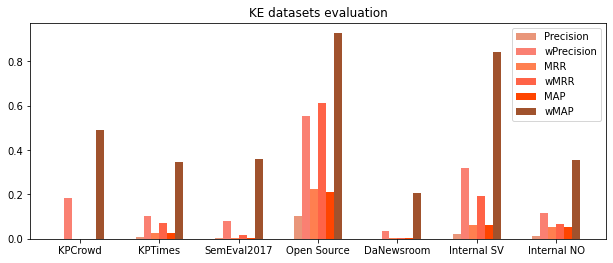

In [15]:
data = df.values.astype(float)
X = np.arange(df.shape[1])
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, data[0], color = 'darksalmon', width = 0.10)
ax.bar(X - 0.15, data[1], color = 'salmon', width = 0.10)
ax.bar(X - 0.05, data[2], color = 'coral', width = 0.10)
ax.bar(X + 0.05, data[3], color = 'tomato', width = 0.10)
ax.bar(X + 0.15, data[4], color = 'orangered', width = 0.10)
ax.bar(X + 0.25, data[5], color = 'sienna', width = 0.10)
ax.set_xticks([i for i,_ in enumerate(df.columns)])
ax.set_xticklabels(df.columns)
ax.legend(metrics[:-2])
ax.set_title('KE datasets evaluation')
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

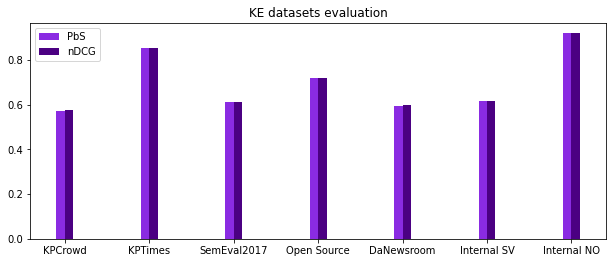

In [16]:
data = df.values[-2:].astype(float) # only PbS & nDCG
X = np.arange(df.shape[1])
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.05, data[0], color = 'blueviolet', width = 0.10)
ax.bar(X + 0.05, data[1], color = 'indigo', width = 0.10)
ax.set_xticks([i for i,_ in enumerate(df.columns)])
ax.set_xticklabels(df.columns)
ax.legend(metrics[-2:])
ax.set_title('KE datasets evaluation')
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

## Version comparison

In [17]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

In [19]:
path_a = "../versions/v0.4.0/reports"
path_b = "../versions/fastText/reports"
files_a = [f for f in listdir(path_a) if isfile(join(path_a, f))]
files_b = [f for f in listdir(path_b) if isfile(join(path_b, f))]
datasets_a = sorted([f.replace('_all_report.csv','').replace('_report.csv','') for f in files_a])
datasets_b = sorted([f.replace('_all_report.csv','').replace('_report.csv','') for f in files_b])
print(f'Reports in path A:\n{datasets_a}')
print(f'Reports in path B:\n{datasets_b}')

Reports in path A:
['danewsroom_500', 'kpcrowd', 'kptimes_500', 'no_themes', 'opensource', 'semeval2017', 'sv_themes']
Reports in path B:
['danewsroom_500', 'kpcrowd', 'kptimes_500', 'no_themes', 'opensource', 'semeval2017', 'sv_themes']


In [20]:
ke_method = 'novel'
metrics = ['Precision', 'wPrecision', 'MRR', 'wMRR', 'MAP', 'wMAP', 'PbS', 'nDCG']

data_a, data_b = [], []
for file in files_a:
    prov = pd.read_csv(join(path_a, file), index_col=0, encoding="utf-8")
    vars = [i for i in prov.index.values if i.endswith('_var')]
    prov = prov.drop(vars).drop(['TP/Results','wTP/Results'])
    data_a.append(list(prov[ke_method].astype(float)))
df_a = pd.DataFrame(data_a, columns=metrics, index=datasets_a)
for file in files_b:
    prov = pd.read_csv(join(path_b, file), index_col=0, encoding="utf-8")
    vars = [i for i in prov.index.values if i.endswith('_var')]
    prov = prov.drop(vars).drop(['TP/Results','wTP/Results'])
    data_b.append(list(prov[ke_method].astype(float)))
df_b = pd.DataFrame(data_b, columns=metrics, index=datasets_b)

In [21]:
df_a.compare(df_b)

Precision        wPrecision           MRR          wMRR         \
                    self  other       self  other   self  other   self  other   
danewsroom_500       NaN    NaN      0.037  0.028  0.002  0.003  0.005  0.006   
kpcrowd              NaN    NaN      0.183  0.194    NaN    NaN    NaN    NaN   
kptimes_500        0.007  0.011      0.101  0.103  0.027  0.029  0.073  0.091   
no_themes          0.013  0.005      0.115  0.072  0.054  0.007  0.069  0.039   
opensource         0.102  0.022      0.555  0.446  0.225  0.052  0.613  0.190   
semeval2017        0.003  0.000      0.080  0.045  0.005  0.000  0.017  0.000   
sv_themes          0.023  0.005      0.320  0.243  0.063  0.007  0.192  0.039   

                  MAP          wMAP           PbS          nDCG         
                 self  other   self  other   self  other   self  other  
danewsroom_500  0.002  0.003  0.208  0.154  0.594  0.551  0.597  0.549  
kpcrowd           NaN    NaN  0.492  0.558  0.571  0.507  0.577  0.509  
kptimes_500     0.027  0.029  0.346  0.365  0.852  0.850  0.852  0.851  
no_themes       0.054  0.007  0.355  0.383  0.920  0.914  0.920  0.914  
opensource      0.209  0.051  0.928  0.902  0.717  0.678  0.718  0.677  
semeval2017     0.005  0.000  0.359  0.252  0.610  0.576  0.611  0.576  
sv_themes       0.060  0.007  0.843  0.789  0.617  0.599  0.616  0.599

In [22]:
df_b.subtract(df_a)

,Precision,wPrecision,MRR,wMRR,MAP,wMAP,PbS,nDCG
danewsroom_500,0.000,-0.009,0.001,0.001,0.001,-0.054,-0.043,-0.048
kpcrowd,0.000,0.011,0.000,0.000,0.000,0.066,-0.064,-0.068
kptimes_500,0.004,0.002,0.002,0.018,0.002,0.019,-0.002,-0.001
no_themes,-0.008,-0.043,-0.047,-0.030,-0.047,0.028,-0.006,-0.006
opensource,-0.080,-0.109,-0.173,-0.423,-0.158,-0.026,-0.039,-0.041
semeval2017,-0.003,-0.035,-0.005,-0.017,-0.005,-0.107,-0.034,-0.035
sv_themes,-0.018,-0.077,-0.056,-0.153,-0.053,-0.054,-0.018,-0.017


### Time comparison

In [23]:
path_a = "../versions/v0.4.0/timing"
path_b = "../versions/fastText/timing"
jsonnames_a = [f for f in listdir(path_a) if isfile(join(path_a, f))]
jsonnames_b = [f for f in listdir(path_b) if isfile(join(path_b, f))]
print(f'Time reports in path A:\n{jsonnames_a}')
print(f'Time reports in path B:\n{jsonnames_b}')
jsons_a = {}
jsons_b = {}
for file in jsonnames_a:
    with open(join(path_a, file)) as f:
        jsons_a[file.replace('.json','')] = json.load(f)
for file in jsonnames_b:
    with open(join(path_b, file)) as f:
        jsons_b[file.replace('.json','')] = json.load(f)
cols = next(iter(jsons_a.values())).keys()
df_ta = pd.DataFrame([jsons_a[k] for k in jsons_a.keys()],
                     columns=cols,
                     index=jsons_a.keys())
df_tb = pd.DataFrame([jsons_b[k] for k in jsons_b.keys()],
                     columns=cols,
                     index=jsons_b.keys())

Time reports in path A:
['semeval2017.json', 'danewsroom_500.json', 'kptimes_500.json', 'kpcrowd.json', 'opensource.json', 'no_themes.json', 'sv_themes.json']
Time reports in path B:
['semeval2017.json', 'danewsroom_500.json', 'kptimes_500.json', 'kpcrowd.json', 'opensource.json', 'no_themes.json', 'sv_themes.json']


In [24]:
df_ta.compare(df_tb)

preprocessing         keyphrase_cand_generation           \
                        self   other                      self    other   
semeval2017           0.0464  0.0421                   20.7199  21.0674   
danewsroom_500        0.0927  0.0922                   36.4715  37.5643   
kptimes_500           0.1605  0.1648                   70.7547  73.1495   
kpcrowd               0.0911  0.0862                   41.8271  42.8302   
opensource            0.0728  0.0761                   27.8685  27.7635   
no_themes                NaN     NaN                    4.2946   4.1021   
sv_themes             0.0103  0.0107                   23.3418  30.4143   

               word_scores         keyphrase_score         doc-embeddings  \
                      self   other            self   other           self   
semeval2017         0.7952  0.7833          0.7884  0.8644         8.6893   
danewsroom_500      1.4894  1.5228          1.0603  1.0981        10.4725   
kptimes_500         2.6969  2.6185          2.4218  2.6267        12.5349   
kpcrowd             1.5455  1.5654          1.4366  1.5616         6.9630   
opensource          1.1611  1.1693          0.8314  0.8407         7.4074   
no_themes           0.1441  0.1404          0.1322  0.5470         1.7174   
sv_themes           0.1602  0.1597          0.1366  0.1404         1.4913   

                       candidate-embeddings         ordering_keyphrases  \
                 other                 self   other                self   
semeval2017     0.8484             268.4619  1.2951              6.1187   
danewsroom_500  1.9600             289.8953  1.4192              6.6274   
kptimes_500     3.2185             285.3927  1.6613              6.8027   
kpcrowd         2.0429             212.6967  1.0786              5.0110   
opensource      1.5485             198.5246  0.9800              4.4737   
no_themes       0.1449              36.6155  0.1670              0.7606   
sv_themes       0.1679              33.3416  0.1628              0.7532   

                       total_elapsed           
                 other          self    other  
semeval2017     6.1213      305.6204  31.0225  
danewsroom_500  6.9210      346.1098  50.5781  
kptimes_500     6.7943      380.7648  90.2341  
kpcrowd         4.9244      269.5716  54.0900  
opensource      4.6209      240.3403  36.9996  
no_themes       0.7525       43.6748   5.8642  
sv_themes       0.7550       59.2355  31.8113

In [25]:
df_tb.subtract(df_ta)

,preprocessing,keyphrase_cand_generation,word_scores,keyphrase_score,doc-embeddings,candidate-embeddings,ordering_keyphrases,total_elapsed
semeval2017,-0.0043,0.3475,-0.0119,0.0760,-7.8409,-267.1668,0.0026,-274.5979
danewsroom_500,-0.0005,1.0928,0.0334,0.0378,-8.5125,-288.4761,0.2936,-295.5317
kptimes_500,0.0043,2.3948,-0.0784,0.2049,-9.3164,-283.7314,-0.0084,-290.5307
kpcrowd,-0.0049,1.0031,0.0199,0.1250,-4.9201,-211.6181,-0.0866,-215.4816
opensource,0.0033,-0.1050,0.0082,0.0093,-5.8589,-197.5446,0.1472,-203.3407
no_themes,0.0000,-0.1925,-0.0037,0.4148,-1.5725,-36.4485,-0.0081,-37.8106
sv_themes,0.0004,7.0725,-0.0005,0.0038,-1.3234,-33.1788,0.0018,-27.4242


# Time Analysis

In [26]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

In [27]:
version_path = "../versions/v0.4.0/timing"
dataset_path = "../versions/others/timing"

version_files = [f for f in listdir(version_path) if isfile(join(version_path, f))]
dataset_files = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))]
print(f'Time reports for version:\n{version_files}')
print(f'Time reports for baselines:\n{dataset_files}')
version_jsons = {}
dataset_jsons = {}
version_files = ['kpcrowd.json', 'kptimes_500.json', 'semeval2017.json']
dataset_files = ['kpcrowd.json', 'kptimes_500.json', 'semeval2017.json']
for file in version_files:
    with open(join(version_path, file)) as f:
        version_jsons[file.replace('.json','')] = json.load(f)
for file in dataset_files:
    with open(join(dataset_path, file)) as f:
        dataset_jsons[file.replace('.json','')] = json.load(f)
version_cols = next(iter(version_jsons.values())).keys()
data_cols = next(iter(dataset_jsons.values())).keys()
df_ver = pd.DataFrame([version_jsons[k] for k in version_jsons.keys()],
                      columns=version_cols,
                      index=version_jsons.keys())
df_data = pd.DataFrame([dataset_jsons[k] for k in dataset_jsons.keys()], 
                       columns=data_cols, 
                       index=dataset_jsons.keys())


Time reports for version:
['semeval2017.json', 'danewsroom_500.json', 'kptimes_500.json', 'kpcrowd.json', 'opensource.json', 'no_themes.json', 'sv_themes.json']
Time reports for baselines:
['semeval2017.json', 'danewsroom_500.json', 'kptimes_500.json', 'kpcrowd.json', 'opensource.json', 'no_themes.json', 'sv_themes.json']


In [28]:
df_ver

,preprocessing,keyphrase_cand_generation,word_scores,keyphrase_score,doc-embeddings,candidate-embeddings,ordering_keyphrases,total_elapsed
kpcrowd,0.0911,41.8271,1.5455,1.4366,6.9630,212.6967,5.0110,269.5716
kptimes_500,0.1605,70.7547,2.6969,2.4218,12.5349,285.3927,6.8027,380.7648
semeval2017,0.0464,20.7199,0.7952,0.7884,8.6893,268.4619,6.1187,305.6204


In [29]:
#df_data['novel'] = df_ver['total_elapsed']
df_data

,tfidf,keybert,kpminer,yake,rake,textrank,singlerank,topicrank
kpcrowd,1487.6599,169.5402,464.7494,501.7306,2.4610,41.6025,222.9372,252.2484
kptimes_500,1912.8570,304.9731,679.4242,806.6886,4.4205,69.9972,315.2775,375.8322
semeval2017,877.2621,74.8115,521.4357,304.9648,1.0995,21.7247,257.0178,264.0052


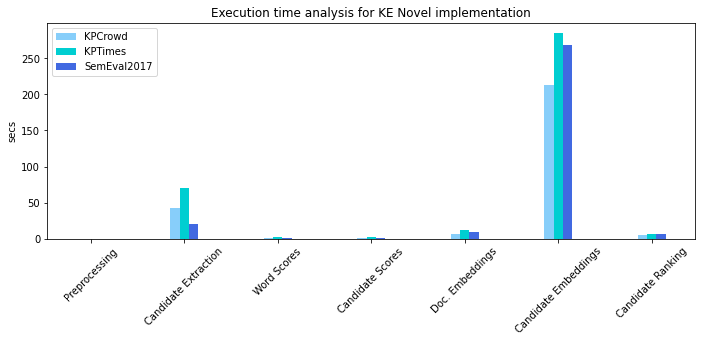

In [30]:
data = df_ver.values.astype(float)
X = np.arange(df_ver.shape[1]-1)
fig = plt.figure(figsize=(9,3))
ax = fig.add_axes([0,0,1,1])
#ax.bar(X - 0.20, data[0][:-1], color = 'paleturquoise', width = 0.10)
ax.bar(X - 0.10, data[0][:-1], color = 'lightskyblue', width = 0.10)
ax.bar(X       , data[1][:-1], color = 'darkturquoise', width = 0.10)
ax.bar(X + 0.10, data[2][:-1], color = 'royalblue', width = 0.10)
#ax.bar(X + 0.20, data[4][:-1], color = 'darkblue', width = 0.10)
ax.set_xticks([i for i in range(df_ver.shape[1]-1)])
ax.set_xticklabels([
    'Preprocessing', 'Candidate Extraction', 'Word Scores',
    'Candidate Scores', 'Doc. Embeddings', 'Candidate Embeddings',
    'Candidate Ranking'], rotation=45)
ax.set_ylabel('secs')
ax.legend(['KPCrowd', 'KPTimes', 'SemEval2017'], loc='upper left')
ax.set_title("Execution time analysis for KE Novel implementation")
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

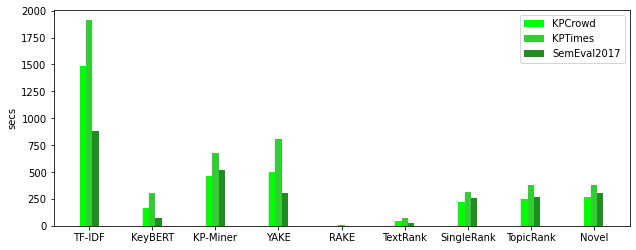

In [31]:
df_data['novel'] = df_ver['total_elapsed']

data = df_data.values.astype(float)
X = np.arange(df_data.shape[1])
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,1,1])
#ax.bar(X - 0.20, data[0], color = 'mediumspringgreen', width = 0.10)
ax.bar(X - 0.10, data[0], color = 'lime', width = 0.10)
ax.bar(X       , data[1], color = 'limegreen', width = 0.10)
ax.bar(X + 0.10, data[2], color = 'forestgreen', width = 0.10)
#ax.bar(X + 0.20, data[4], color = 'darkgreen', width = 0.10)
ax.set_xticks([i for i in range(df_data.shape[1])])
ax.set_xticklabels(['TF-IDF','KeyBERT','KP-Miner','YAKE','RAKE','TextRank','SingleRank','TopicRank','Novel'])
ax.set_ylabel('secs')
ax.legend(['KPCrowd', 'KPTimes', 'SemEval2017'])
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../timing_comparison.png')